# Youth Risk Behavior Survey (YRBS) Data Cleanup

In [1]:
import sys
import pandas as pd
import numpy as np
from pathlib import Path
from sqlalchemy import inspect, create_engine
import time

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Start reading data files
start_time = time.time()

# national_data_file = Path("data/sadc_2019_national.dat")
# district_data_file = Path("data/sadc_2019_district.dat")
state_a_m_data_file = Path("data/sadc_2019_state_a_m.dat")
state_n_z_data_file = Path("data/sadc_2019_state_n_z.dat")

# national_cols = range(0, 200)
# national_df = pd.read_csv(
#     national_data_file,
#     nrows = 100,
#     header = 0,
#     delim_whitespace = True, 
#     engine = 'python', 
#     on_bad_lines = 'skip', 
#     names = national_cols,
#     usecols = national_cols
# )

# district_cols = range(0, 196)
# district_df = pd.read_csv(
#     district_data_file,
#     nrows = 100,
#     header = 0,
#     delim_whitespace = True, 
#     engine = 'python', 
#     on_bad_lines = 'skip',
#     names = district_cols,
#     usecols = district_cols
# )

state_a_m_cols = range(0, 199)
state_a_m_df = pd.read_csv(
    state_a_m_data_file,
    # nrows = 1000,
    header = 0,
    delim_whitespace = True, 
    engine = 'python', 
    on_bad_lines = 'skip',
    names = state_a_m_cols,
    usecols = state_a_m_cols
)

state_n_z_cols = range(0, 198)
state_n_z_df = pd.read_csv(
    state_n_z_data_file,
    # nrows = 1000,
    header = 0,
    delim_whitespace = True, 
    engine = 'python', 
    on_bad_lines = 'skip',
    names = state_n_z_cols,
    usecols = state_n_z_cols
)

current_time = time.time()
elapsed_time = current_time - start_time
print(f"duration: {elapsed_time}")

duration: 52.29925298690796


In [3]:
# print(f"National: {national_df.shape}")
# print(f"District: {district_df.shape}")
print(f"State A-M: {state_a_m_df.shape}")
print(f"State N-Z: {state_n_z_df.shape}\n")

State A-M: (775894, 199)
State N-Z: (754494, 198)



In [4]:
# display(national_df.head(3))
# display(district_df.head(3))
display(state_a_m_df.head(3))
display(state_n_z_df.head(3))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,AL,Alabama,(AL),State,2,1991,1,69.1663,15,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4,24,2,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,3,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None,None,None
1,AL,Alabama,(AL),State,2,1991,1,80.3232,15,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.,.22,3,3,11,3,531,1,2,22,6,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,1,.,.,.,.,1,1,2,.,.,2,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.4,1,2,8,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
2,AL,Alabama,(AL),State,2,1991,1,66.5061,20,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.32,5,3,53,261,1,1,44,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,1,.,.,.,1,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,1,7,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,NE,Nebraska,(NE),State,2,1991,1,28.6728,7.0,2,8457,4,.,1,2,3,.,.,.,.,.,.,.,.,.,.21,5,6,11521,24,27,634,3,127823234,1,1,2,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,1,1,1,1,1,.,1,2,.,.,.,.,.,.,1,1,.,.,.,1,1,1,.,.,.,.,.,.,.,1,.,.,1,1,1,1,1,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,6,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
1,NE,Nebraska,(NE),State,2,1991,1,24.9328,9.0,1,8458,4,.,1,1,6,.,.,.,.,.,.,.,.,.,.14,3,11321,11,111,1,22,6,1,1,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,1,1,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,2,2,2,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None,None
2,NE,Nebraska,(NE),State,2,1991,1,38.1923,6.0,1,10788,5,.,2,1,6,.,.,.,.,.,.,.,.,.,.12,5,1,22111,11,53,111,1,1,211111144,1,1,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.2,1,1,6,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.


In [5]:
# Concatenate these dataframes
state_df = pd.concat([state_a_m_df, state_n_z_df])
state_df.shape

(1530388, 199)

In [6]:
state_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,AL,Alabama,(AL),State,2,1991,1,69.1663,15.0,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4,24,2,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,3,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None,None,None
1,AL,Alabama,(AL),State,2,1991,1,80.3232,15.0,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.,.22,3,3,11,3,531,1,2,22,6,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,1,.,.,.,.,1,1,2,.,.,2,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.4,1,2,8,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
2,AL,Alabama,(AL),State,2,1991,1,66.5061,20.0,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.32,5,3,53,261,1,1,44,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,1,.,.,.,1,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,1,7,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None
3,AL,Alabama,(AL),State,2,1991,1,89.3992,5.0,1,9562,5,.,1,1,6,.,.,.,.,.,.,.,.,.,.31,1,1,1,53,251,1,1,32,6,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,1,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,2,7,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
4,AL,Alabama,(AL),State,2,1991,1,59.2770,1.0,1,9563,5,.,.,1,6,.,.,.,.,.,.,.,.,.,.,1,5,1,2,11,11,111,1,1,33,1,.,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,2,.,.,.,.,.,.,.,2,2,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.


In [7]:
# # Save a merged copy of curated data
# filepath = Path(f'data/state_survey_data_merged.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)
# # df.drop(columns=['effectOfAccountingCharges', 'extraordinaryItems','nonRecurring', 'otherItems', 'discontinuedOperations'], inplace=True)
# state_df.to_csv(filepath)

In [8]:
state_df[12].value_counts() #age

1    573457
2    559022
5    102961
4    102863
6     87905
3     52187
7     42637
.      9356
Name: 12, dtype: int64

In [9]:
# Create a new dataframe while identifying columns       1	5	7	8	9	10	11	12	13	14	15
renamed_df = state_df.rename(columns={
    0: "sitecode",
    1: "sitename",
    2: "sitecode2",
    3: "sitetype",
    4: "sitetypenum",
    5: "year",
    6: "survyear",
    7: "weight",
    8: "stratum", 
    9: "PSU",
    10: "unknown1",
    11: "unknown2",
    12: "age",
    13: "grade", # checked
    14: "race4",
    15: "race7", # checked
    16: "stheight",
    17: "stweight",
    18: "bmi",
    20: "bmipct",
    21: "qnobese",
    22: "qnowt",
    23: "Q66",
    24: "Q65",
    25: "sexid",
    26: "sexid2",
    27: "sexpart",
    28: "sexpart2",
    29: "29",
    30: "30"
})
# renamed_df = renamed_df.sort_values(by=["year", "PSU"])
display(renamed_df.head())
display(renamed_df.tail())

,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,AL,Alabama,(AL),State,2,1991,1,69.1663,15.0,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4,24,2,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,3,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None,None,None
1,AL,Alabama,(AL),State,2,1991,1,80.3232,15.0,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.,.22,3,3,11,3,531,1,2,22,6,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,1,.,.,.,.,1,1,2,.,.,2,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.4,1,2,8,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
2,AL,Alabama,(AL),State,2,1991,1,66.5061,20.0,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.32,5,3,53,261,1,1,44,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,1,.,.,.,1,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,1,7,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,None
3,AL,Alabama,(AL),State,2,1991,1,89.3992,5.0,1,9562,5,.,1,1,6,.,.,.,.,.,.,.,.,.,.31,1,1,1,53,251,1,1,32,6,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,1,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,2,7,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None
4,AL,Alabama,(AL),State,2,1991,1,59.2770,1.0,1,9563,5,.,.,1,6,.,.,.,.,.,.,.,.,.,.,1,5,1,2,11,11,111,1,1,33,1,.,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,2,.,.,.,.,.,.,.,2,2,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.


,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
754489,WV,West,Virginia,(WV),State,2,2019,15.0,87.0022,13,1,2241211,7,1,4,1,6,1.75,90.72,29.6229,93.84,2,113,1,1,2,2512211111112122222221121111111117111111111111...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,.,1,2,.,2,2,.,2,2,2,2,.,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,1,1,1,1,2,2,2,2,1,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,2,2,1,2,2,2,2,2,2,1,2,1,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None,None,None,None,None,None,None,None,None,None,NaN
754490,WV,West,Virginia,(WV),State,2,2019,15.0,157.7903,15,1,2241212,7,1,4,1,6,1.63,79.38,29.8769,94.16,2,111,1,1,1,1511111111112111222221114111111111111111111111...,2,2,.,.,2,2,2,2,2,2,2,2,2,.,.,2,2,2,2,2,2,2,1,1,2,.,1,2,.,2,2,.,2,2,2,2,.,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,.,.,.,1,1,2,2,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,.,.,.,.,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None,None,None,None,None,None,None,None,None,None,NaN
754491,WV,West,Virginia,(WV),State,2,2019,15.0,157.7903,15,1,2241213,7,1,4,.,.,.,.,.,.,.,.11,1,1,1,1,42111111211122222,2111,11111,1,111111111111,211111111111112326315131333222,.,.,.,1,1,2,2,2,2,2,2,2,2,.,.,2,2,2,2,2,.,.,2,2,2,.,.,2,.,2,2,.,.,.,2,.,.,2,2,2,2,2,2,2,2,2,2,2,2,.,2,2,2,2,.,.,.,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,.,.,.,.,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None,None,None,None,NaN
754492,WV,West,Virginia,(WV),State,2,2019,15.0,157.7903,15,1,2241214,7,1,4,1,6,1.63,71.22,26.8057,88.18,2,113,1,1,2,2512411111112122221221121111,11,111111111111111112182332534222113321617111222231,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,.,1,.,.,2,2,.,2,2,2,2,.,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,1,2,2,2,2,2,2,1,1,2,2,2,1,1,2,1,2,2,2,2,2,2,2,2,1,2,2,.,.,2,2,2,2,.,.,1,1,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None,None,None,None,None,None,None,None,NaN
754493,WV,West,Virginia,(WV),State,2,2019,15.0,157.7903,15,1,2241215,7,1,4,1,6,1.68,86.18,30.5343,94.89,2,113,1,1,2,25123511111113431111211,111,11,721281111111111112167333351242222448212121221241,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,.,.,2,.,1,.,.,2,2,.,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,1,2,2,.,.,2,2,2,2,.,.,2,1,2,2,2,1,2,2,1,2,2,1,2,1,2,1,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None,None,None,None,None,None,None,NaN


In [10]:
cols = range(31,199) # DROP remaining columns
renamed_df.drop(columns=cols, inplace=True)
df = renamed_df

In [11]:
df.head()

,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30
0,AL,Alabama,(AL),State,2,1991,1,69.1663,15.0,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4
1,AL,Alabama,(AL),State,2,1991,1,80.3232,15.0,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.,.22,3,3,11,3,531
2,AL,Alabama,(AL),State,2,1991,1,66.5061,20.0,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.32,5,3,53,261,1
3,AL,Alabama,(AL),State,2,1991,1,89.3992,5.0,1,9562,5,.,1,1,6,.,.,.,.,.,.,.,.,.,.31,1,1,1,53,251
4,AL,Alabama,(AL),State,2,1991,1,59.2770,1.0,1,9563,5,.,.,1,6,.,.,.,.,.,.,.,.,.,.,1,5,1,2,11


In [12]:
df["unknown1"].value_counts()

2          158959
1          157426
3           19145
4           10146
5            7072
            ...  
54426           1
54427           1
54428           1
54429           1
2239906         1
Name: unknown1, Length: 1137005, dtype: int64

In [13]:
df["unknown2"].value_counts()

5          298028
4          297228
6          253514
3          146123
7          123052
            ...  
1426069         1
1198371         1
1198370         1
1198369         1
2241215         1
Name: unknown2, Length: 393394, dtype: int64

In [14]:
df["race4"].value_counts()

1    775549
2    255886
3    236661
4    213209
.     49083
Name: race4, dtype: int64

In [15]:
df["race7"].value_counts()

6    665233
3    235196
1    221445
4    187275
2     98886
.     57474
7     49252
5     15627
Name: race7, dtype: int64

In [30]:
my_2019_df = df.loc[df["year"] == 2019]
my_2019_df.head()

,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30
675704,AK,Alaska,(AK),State,2,2019,15,4.7946,11.0,14,12,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.3111,1,1,11111111221,1,11111
675705,AK,Alaska,(AK),State,2,2019,15,14.3743,3.0,4,13,.,.,.,.,.,.,.,40.4988,.,.,.,.,.,.,.55,1,1,121,2222222,2
675706,AK,Alaska,(AK),State,2,2019,15,3.0286,7.0,10,14,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.4111,1,1,12111221221,2,111
675707,AK,Alaska,(AK),State,2,2019,15,5.3658,7.0,8,15,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.5122,1,1,12111221111,2,1112211
675708,AK,Alaska,(AK),State,2,2019,15,21.7647,2.0,2,16,.,.,.,.,.,.,.,7.0000,.,.,.,.,.,.,.51,1,1,1,2,2


In [17]:
my_2017_df = df.loc[df["year"] == 2017]
my_2017_df.shape

(149903, 31)

In [18]:
my_2015_df = df.loc[df["year"] == 2015]
my_2015_df.shape

(154209, 31)

In [19]:
my_2013_df = df.loc[df["year"] == 2013]
my_2013_df.shape

(134410, 31)

<AxesSubplot:xlabel='year'>

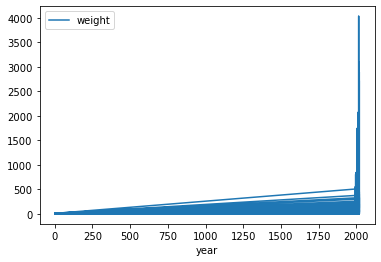

In [32]:

df.plot(x="year", y="weight")

In [18]:
# Need to modify where year == 2 change to 2000, tyhen sort by year, PSU
# df["year"] = np.where(df["year"] == 2, 2000)
df['year'].mask(df['year'] == 2, 2000, inplace=True)

In [19]:
df["year"].value_counts()

2000    393386
2015    154209
2017    149903
2019    138132
2013    134410
2011     89283
2009     80010
2007     67427
2005     65603
2003     48881
2001     45013
1993     42424
1997     41890
1995     34757
1999     29067
1991     15993
Name: year, dtype: int64

In [20]:
df.sort_values(by = ["year", "sitename"], ascending = [True, True])
df.head()

,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30
0,AL,Alabama,(AL),State,2,1991,1,69.1663,15.0,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4
1,AL,Alabama,(AL),State,2,1991,1,80.3232,15.0,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.,.22,3,3,11,3,531
2,AL,Alabama,(AL),State,2,1991,1,66.5061,20.0,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.32,5,3,53,261,1
3,AL,Alabama,(AL),State,2,1991,1,89.3992,5.0,1,9562,5,.,1,1,6,.,.,.,.,.,.,.,.,.,.31,1,1,1,53,251
4,AL,Alabama,(AL),State,2,1991,1,59.2770,1.0,1,9563,5,.,.,1,6,.,.,.,.,.,.,.,.,.,.,1,5,1,2,11


In [30]:
cols = ["sitetypenum", "year", "survyear", "weight", "stratum", "PSU", "unknown1", "unknown2", "age", "grade", "race4", 
        "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt", "Q66", "Q65", "sexid", "sexid2", "sexpart", "sexpart2", "29", "30"]
new_df = df[cols].copy()
new_df.head()

,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30
0,2,1991,1,69.1663,15.0,2,3929,1,.,2,4,.,.,.,.,.,.,.,.,.,.53,2,4,4,4,4
1,2,1991,1,80.3232,15.0,1,4986,2,.,3,1,6,.,.,.,.,.,.,.,.,.22,3,3,11,3,531
2,2,1991,1,66.5061,20.0,2,7284,4,.,2,1,6,.,.,.,.,.,.,.,.,.32,5,3,53,261,1
3,2,1991,1,89.3992,5.0,1,9562,5,.,1,1,6,.,.,.,.,.,.,.,.,.31,1,1,1,53,251
4,2,1991,1,59.2770,1.0,1,9563,5,.,.,1,6,.,.,.,.,.,.,.,.,.,1,5,1,2,11


<AxesSubplot:xlabel='year'>

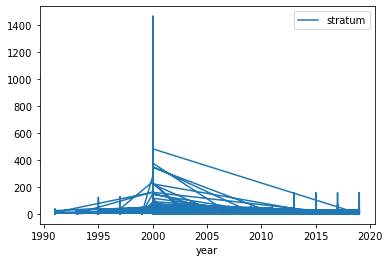

In [31]:
# Now decode the categorical data fro visualizations
# race7_dict = {
#     "0": "None",
#     "1": "American Indian/Alaska Native",
#     "2": "Asian",
#     "3": "Black or African American",
#     "4": "Hispanic/Latino",
#     "5": "Native Hawaiian/Other Pacific Islander",
#     "6": "White",
#     "7": "Multiple Races (Non-Hispanic)",
# }

new_df.plot(x="year", y=["stratum"])

In [40]:
df_12th_graders = df.loc[df["grade"] == "4"].copy()
df_12th_graders.head()

,sitecode,sitename,sitecode2,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,unknown1,unknown2,age,grade,race4,race7,stheight,stweight,bmi,19,bmipct,qnobese,qnowt,Q66,Q65,sexid,sexid2,sexpart,sexpart2,29,30
6,AL,Alabama,(AL),State,2,1991,1,63.5552,15.0,1,15002,.,2,4,2,3,.,.,.,.,.,.,.,.,.,.25,2,11,52,111,1
7,AL,Alabama,(AL),State,2,1991,1,54.4759,5.0,1,15003,.,2,4,2,3,.,.,.,.,.,.,.,.,.,.12,1,1,1,11,64
10,AL,Alabama,(AL),State,2,1991,1,56.4935,3.0,1,24624,2,2,4,4,.,.,.,.,.,.,.,.,.,.,.21,2,3,31,3,54
372,AL,Alabama,(AL),State,2,1991,1,80.6243,15.0,1,438627,5,2,4,1,6,.,.,.,.,.,.,.,.,.,.24,1,3,1,64,54
661,AL,Alabama,(AL),State,2,1991,1,62.2582,19.0,1,725508,6,2,4,1,6,.,.,.,.,.,.,.,.,.,.51,1,1,2,11,11


In [41]:
df_12th_graders = df_12th_graders.sort_values(by=["year"])

df_12th_graders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223197 entries, 6 to 753090
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sitecode     223197 non-null  object 
 1   sitename     223197 non-null  object 
 2   sitecode2    223197 non-null  object 
 3   sitetype     223197 non-null  object 
 4   sitetypenum  223197 non-null  object 
 5   year         223197 non-null  int64  
 6   survyear     223197 non-null  int64  
 7   weight       223197 non-null  float64
 8   stratum      223197 non-null  float64
 9   PSU          223197 non-null  int64  
 10  unknown1     223197 non-null  int64  
 11  unknown2     223197 non-null  object 
 12  age          223197 non-null  object 
 13  grade        223197 non-null  object 
 14  race4        223197 non-null  object 
 15  race7        223197 non-null  object 
 16  stheight     223197 non-null  object 
 17  stweight     223197 non-null  object 
 18  bmi          223197 non-

In [42]:
# df_12th_graders["stweight"] = df_12th_graders.loc[df_12th_graders["stweight"] === ".", "stweight"] = 0
# df_12th_graders["stweight"].value_counts()


In [43]:
def remove_dots(df, col):
    dots = df[ df[col] == "." ].index
    df.drop(dots , inplace=True)
    df[col] = df[col].astype(float)
    return

110284    64.41
110310    61.24
110287    63.50
110291    79.38
110299    63.50
Name: stweight, dtype: float64

In [44]:
remove_dots(df_12th_graders, "stweight")
remove_dots(df_12th_graders, "stheight")

display(df_12th_graders["stweight"].head())
display(df_12th_graders["stheight"].head())

110284    64.41
110310    61.24
110287    63.50
110291    79.38
110299    63.50
Name: stweight, dtype: float64

110284    1.78
110310    1.78
110287    1.73
110291    1.75
110299    1.80
Name: stheight, dtype: float64

<AxesSubplot:xlabel='year'>

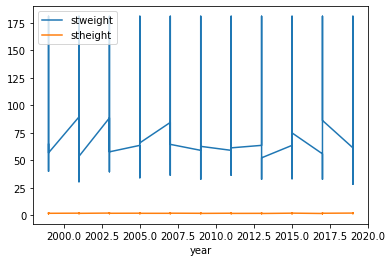

In [47]:
df_12th_graders.plot(x="year", y=["stweight", "stheight"])

In [24]:
"""
How old are you?
A. 12 years old or younger
B. 13 years old
C. 14 years old
D. 15 years old
E. 16 years old
F. 17 years old
G. 18 years old or older
"""
# df["age_code"] = df[12]
# df["age_code"].value_counts()

6    55482
5    55447
4    49384
7    34287
3    21367
.      710
1      403
2      259
Name: age_code, dtype: int64

In [25]:
"""
What is your sex?
A. Female
B. Male
"""

# df["sex"] = df[13] #.value_counts()
# df["sex"].value_counts()

1    109540
2    106891
.       908
Name: sex, dtype: int64

In [26]:
"""
In what grade are you?
A. 9th grade
B. 10th grade
C. 11th grade
D. 12th grade
E. Ungraded or other grade
"""
# df["grade"] = df[14]
# df["grade"].value_counts()

3    54324
4    54109
1    53986
2    53604
.     1316
Name: grade, dtype: int64

In [27]:
"""
4-level variable from race and ethnicity questions:

1 = “White”
2 = “Black or African American”
3 = “Hispanic/Latino”
4 = “All Other Races”
"""
# df["race4"] = df[15]
# df["race4"].value_counts()

1    90500
3    57717
2    46403
4    19433
.     3286
Name: race4, dtype: int64

In [58]:
"""
7-level variable from race and ethnicity questions:
1 = “American Indian/Alaska Native”
2 = “Asian”
3 = “Black or African American”
4 = “Hispanic/Latino”
5 = “Native Hawaiian/Other Pacific Islander”
6 = “White”
7 = “Multiple Races (Non-Hispanic)”
"""
# df["race7"] = df[16]
# df["race7"].value_counts()

'\n7-level variable from race and ethnicity questions:\n1 = “American Indian/Alaska Native”\n2 = “Asian”\n3 = “Black or African American”\n4 = “Hispanic/Latino”\n5 = “Native Hawaiian/Other Pacific Islander”\n6 = “White”\n7 = “Multiple Races (Non-Hispanic)”\n'

In [59]:
# # how tall are you without shoes?
# df["stheight"] = df[17]
# df["stheight"].value_counts()

In [60]:
# how much do you weight without shoes?
# df["stweight"] = df[18]
# df["stweight"].head()

In [61]:
# Body mass index (BMI)
# df["bmi"] = df[19]
# df["bmi"].value_counts()

In [62]:
# Student’s BMI percentile
# df["bmipct"] = df[20]
# df["bmipct"].value_counts()

In [63]:
# Obesity indicator
# df["qnobese"] = df[21]
# df["qnobese"].value_counts()

In [64]:
# Overweight indicator
# df["qnowt"] = df[22]
# df["qnowt"].value_counts()

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,XX,United,States,(XX),National,3,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None,.,.,.,.,.,.,.,.,.,.,.
1,XX,United,States,(XX),National,3,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,4,2,1,6,.,.,.,.,.,.
2,XX,United,States,(XX),National,3,1991,1,0.7787,11200,21,11716,5,.,2,1,6,.,.,.,.,.,.,.,.,.,.45,5,3,22111,76,57,734,2,1,41,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,1,1,.,.,.,.,.,.,2,1,.,.,.,1,1,1,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,3,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,5,2,1,6,.,.,.,.,.,.
3,XX,United,States,(XX),National,3,1991,1,1.3896,12100,8,13693,6,.,.,4,.,.,.,.,.,.,.,.,.,.,.15,5,8,1,77,27,726,6,6,127823852,1,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,.,.,.,.,.,.,1,1,.,.,.,1,1,1,.,.,1,.,.,.,.,1,.,.,1,1,1,1,1,2,2,1,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,6,2,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,6,.,4,.,.,.,.,.,.,.
4,XX,United,States,(XX),National,3,1991,1,0.1250,19006,143,20320,.,2,4,3,4,.,.,.,.,.,.,.,.,.,.32,2,2,22111,63,111,1,1,211111133,1,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,2,.,4,3,4,.,.,.,.,.,.


In [54]:
cols = ["year", "sur_year", "weight", "stratum", "PSU", "UNKN1", "sex", "age_code", "grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt"]

new_df = df[cols].copy()
new_df.head()

,year,sur_year,weight,stratum,PSU,UNKN1,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.
1,1991,1,0.3201,11400,33,9423,.,4,2,1,6,.,.,.,.,.,.
2,1991,1,0.7787,11200,21,11716,.,5,2,1,6,.,.,.,.,.,.
3,1991,1,1.3896,12100,8,13693,.,6,.,4,.,.,.,.,.,.,.
4,1991,1,0.1250,19006,143,20320,2,.,4,3,4,.,.,.,.,.,.


In [55]:
new_df["year"].value_counts()

2009    16410
1993    16296
1997    16262
2015    15624
2011    15425
1999    15349
2003    15214
2017    14765
2007    14041
2005    13917
2019    13677
2001    13601
2013    13583
1991    12271
1995    10904
Name: year, dtype: int64

In [9]:
new_df = df[[6, 8, 9, 10, 11]].copy()
new_df.rename(columns={6: "year", 8: "weight", 9: "stratum", 10: "PSU", 11: "age"}, inplace=True)
display(new_df.head())
display(new_df.tail())

,year,weight,stratum,PSU,age
0,1991,0.5060,12310,29,3538
1,1991,0.3201,11400,33,9423
2,1991,0.7787,11200,21,11716
3,1991,1.3896,12100,8,13693
4,1991,0.1250,19006,143,20320


,year,weight,stratum,PSU,age
217334,2019,1.1045,201,330220,2258519
217335,2019,1.1045,201,330220,2258520
217336,2019,1.1045,201,330220,2258521
217337,2019,1.7753,112,343678,2258522
217338,2019,4.7401,112,343678,2258523


<AxesSubplot:xlabel='year'>

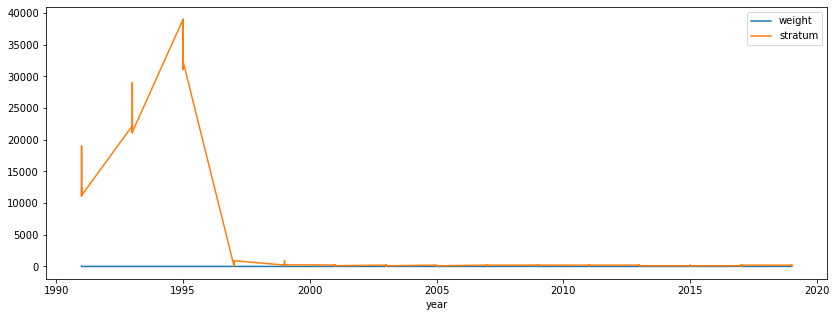

In [21]:
new_df.plot(x='year', y=['weight', 'stratum'], figsize=(14,5))